**Title of Project**

 White ine Quality Prediction using Support Vector Machine

**Objective**

Predict the quality of white wine using the Support Vector Machine (SVM) algorithm based on various physicochemical properties.

**Data Source**

Red Wine Quality Dataset: winequality-red.csv
White Wine Quality Dataset: winequality-white.csv

Link: https://github.com/shrikant-temburwar/Wine-Quality-Dataset

**Import Libraries**


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

**Import Data**

In [9]:
import pandas as pd

# Importing white wine data with the correct delimiter
white_wine_data = pd.read_csv('https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-white.csv', delimiter=';')

# Check the columns again to ensure they are properly parsed
print(white_wine_data.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


**Describe Data**

In [10]:
# Describing white wine data
print(white_wine_data.describe())

print("\nData Info:")
print(white_wine_data.info())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

**Data Visualization**


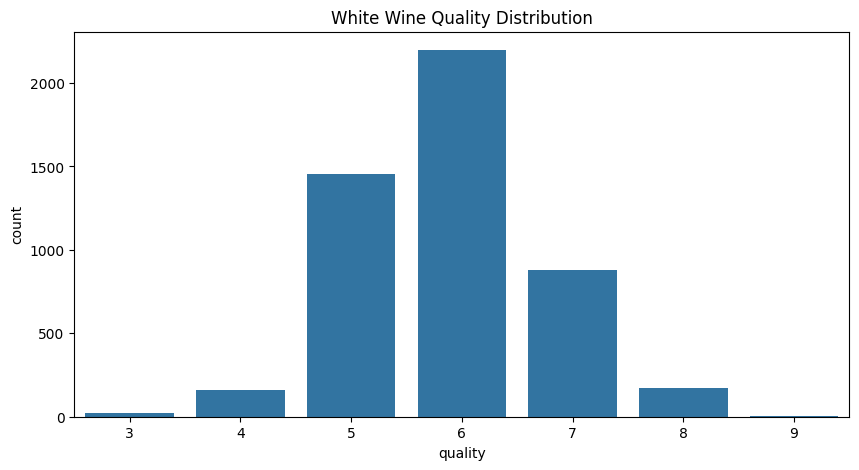

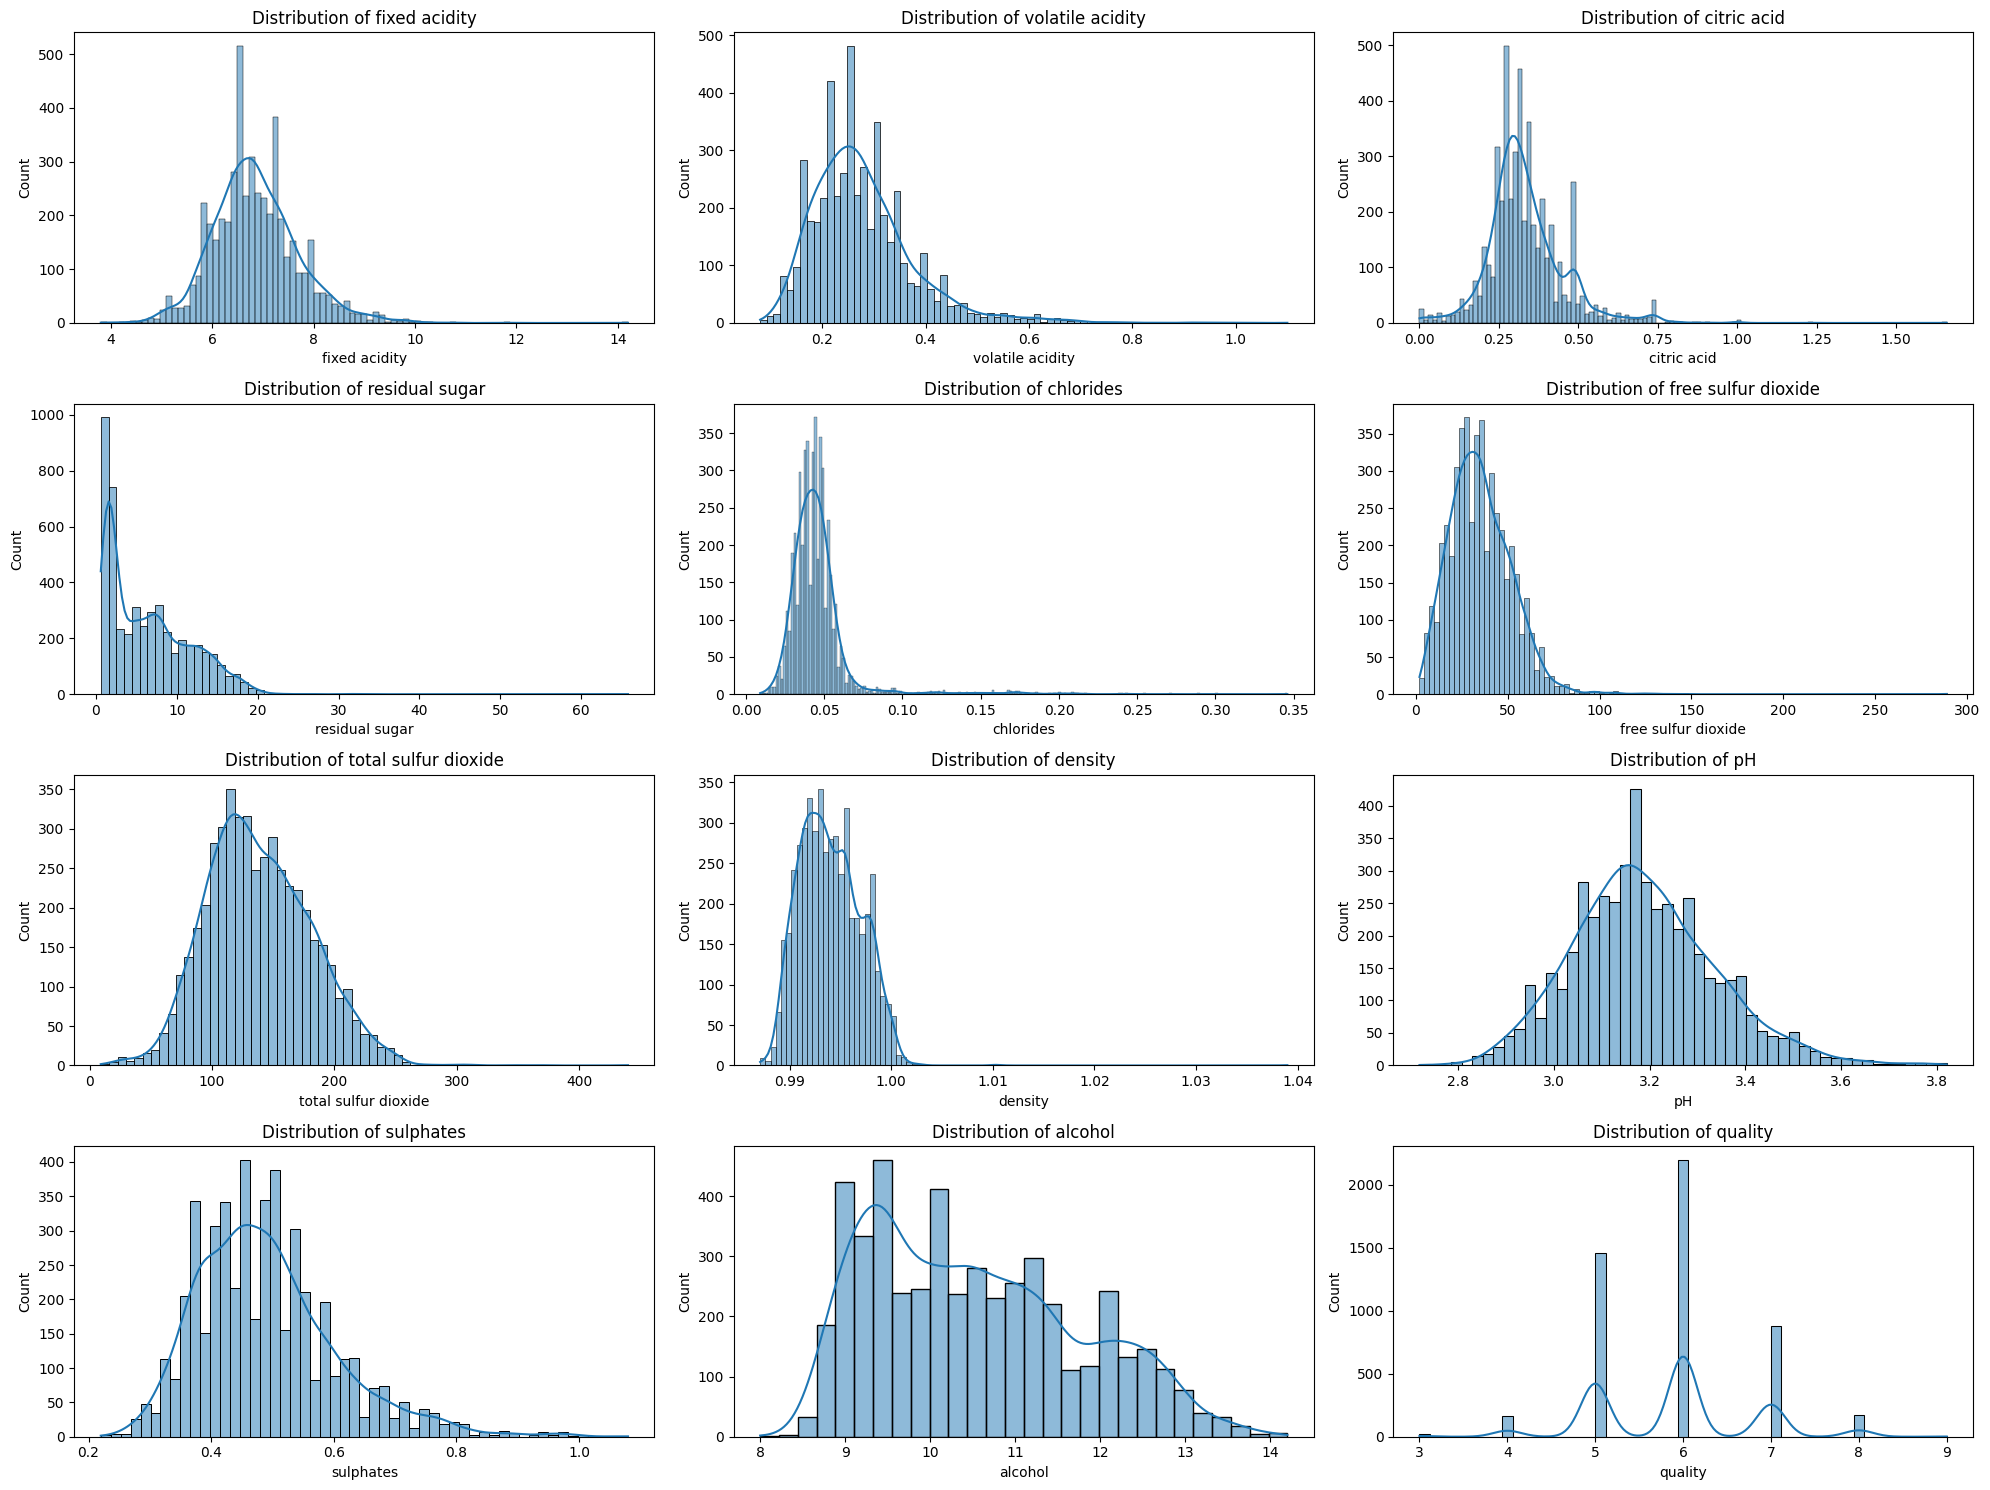

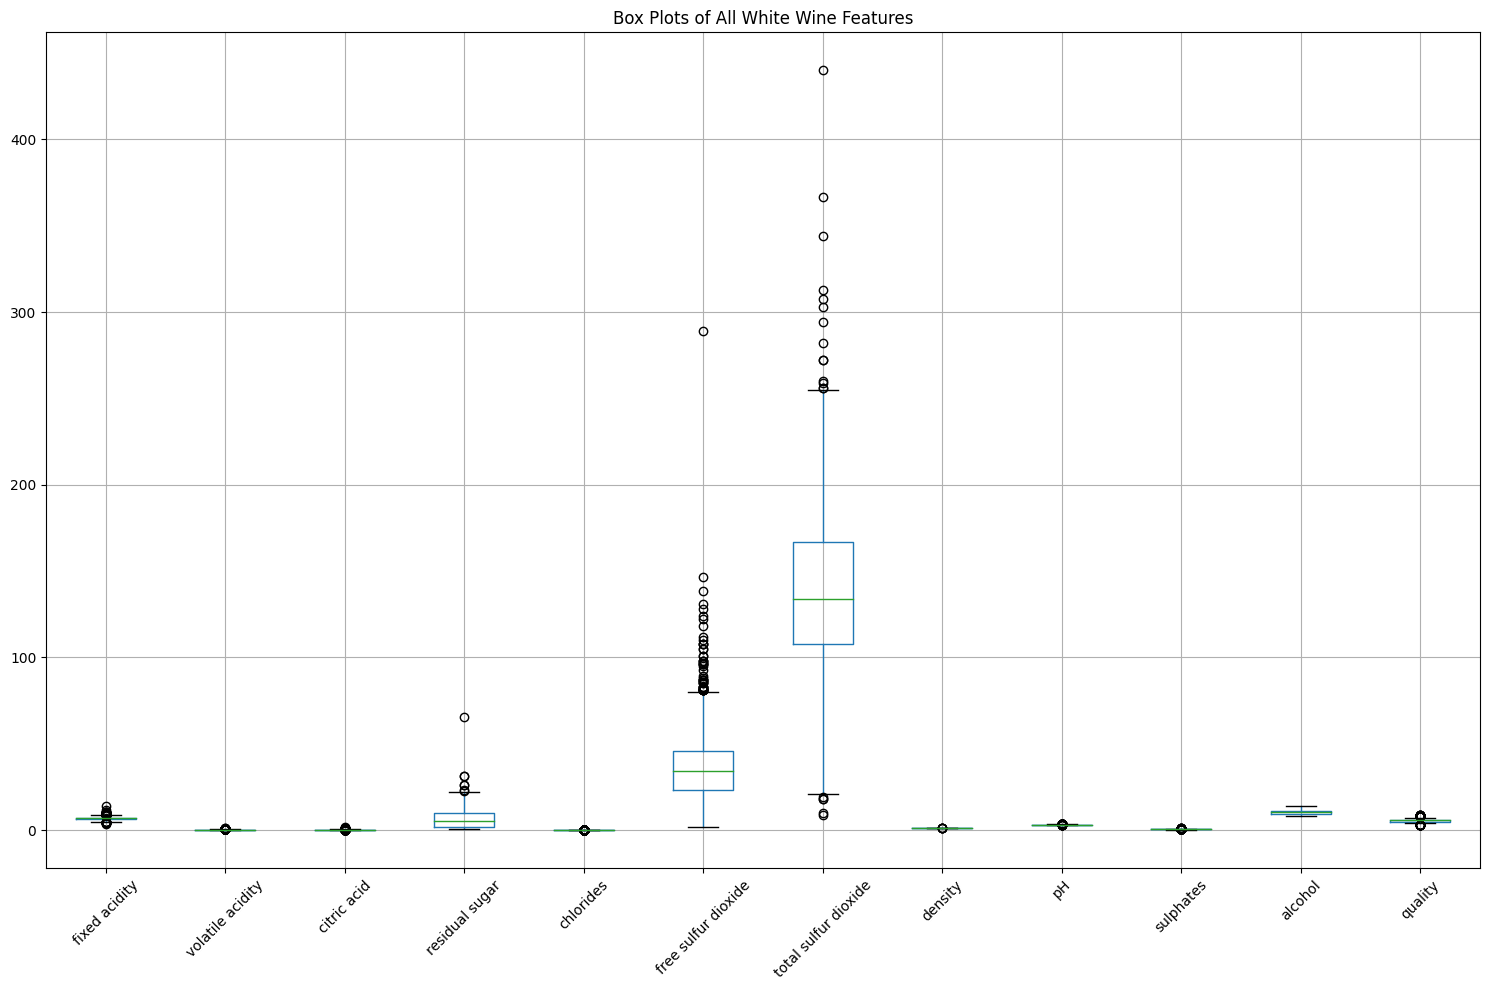

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of wine quality in white wine
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=white_wine_data)
plt.title('White Wine Quality Distribution')
plt.show()

# Data Visualization - Histogram Plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(white_wine_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(white_wine_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

# Data Visualization - Box Plots
plt.figure(figsize=(15, 10))
white_wine_data.boxplot()
plt.title('Box Plots of All White Wine Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feature Selection**


All Features:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Top 5 Selected Features:
1. residual sugar
2. chlorides
3. total sulfur dioxide
4. density
5. alcohol


<Figure size 1500x1000 with 0 Axes>

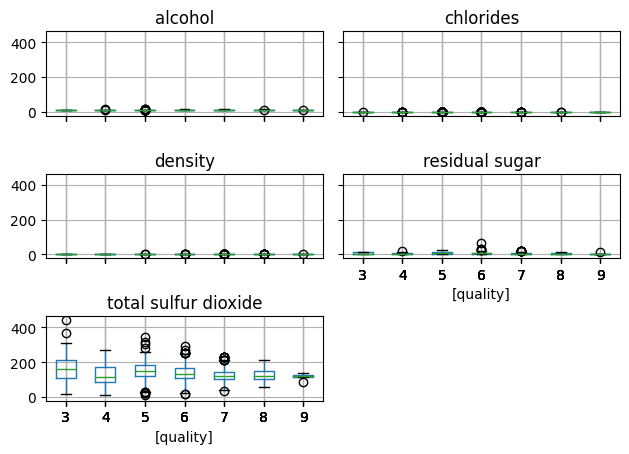

In [17]:
# Feature Selection
X = white_wine_data.drop('quality', axis=1)
y = (white_wine_data['quality'] >= 7).astype(int)

# Display all features
print("\nAll Features:")
for i, feature in enumerate(X.columns, 1):
    print(f"{i}. {feature}")

# Select top 5 features
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

print("\nTop 5 Selected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")



# Box Plots for Important Features
plt.figure(figsize=(15, 10))
white_wine_data[selected_features + ['quality']].boxplot(by='quality')
plt.title('Box Plots of Top 5 Important Features by Wine Quality')
plt.suptitle('')  # This removes the automatic suptitle
plt.tight_layout()
plt.show()

# Data Preprocessing

In [19]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


#Define Target Variable (y) and


For White Wine:



In [20]:
X = X_scaled[selected_features]


**Train Test Split**


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling


In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

**Model Evaluation**


In [23]:
y_pred = svm_model.predict(X_test)
print("\nWhite Wine Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Regular', 'Good Quality']))
print("White Wine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


White Wine Classification Report:
              precision    recall  f1-score   support

     Regular       0.81      0.97      0.88       753
Good Quality       0.68      0.23      0.34       227

    accuracy                           0.80       980
   macro avg       0.75      0.60      0.61       980
weighted avg       0.78      0.80      0.76       980

White Wine Confusion Matrix:
[[729  24]
 [175  52]]


**Prediction**

In [27]:
new_white_wine_samples = X_test[:6]
predicted_white_quality = svm_model.predict(new_white_wine_samples)
print("\nPredicted White Wine Quality for samples:")
for i, prediction in enumerate(predicted_white_quality):
    quality = "Good Quality" if prediction == 1 else "Regular Quality"
    print(f"Sample {i+1}: {quality}")


Predicted White Wine Quality for samples:
Sample 1: Regular Quality
Sample 2: Good Quality
Sample 3: Regular Quality
Sample 4: Regular Quality
Sample 5: Regular Quality
Sample 6: Regular Quality


**Explanation**

Data Preprocessing: Ensured the data was clean and standardized for the SVM model.

Feature and Target Variables: Defined the features and target variables for the model.

Train-Test Split: Separated data into training and test sets to evaluate model performance.

Modeling: Trained SVM models to predict wine quality.
Model Evaluation: Assessed model performance using classification reports and confusion matrices.

Prediction: Tested the models with new data samples to make predictions.